

## Table of Contents
<ul>
<li><a href="#intro">Gathering Data</a></li>
<li><a href="#assessing">Exploring Data Analysis</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#conclusions">Analysis</a></li>
</ul>

<a id='intro'></a>
## Gathering Data

> I will derive data from 3 sources mainly:-
> 1. Twitter archive sent by WeRateDogs
> 2. Loading the Image Predictions File
> 3. Extracting data using the Twitter API Tweepy

In [286]:
#importing the necessary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import csv
import tweepy
from twython import Twython
import timeit
import json
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import requests
import io

consumer_key = 'Qb8rIgYoKDR2ohkt9kHBH8N9z'
consumer_secret = 'uP2WGjS8AaOmW1BkFC9aToyfeOdgtNpXydqk5y7ajbelb30ZXw'
access_token = '3073378862-gDnYLQio3vKDNxu1Mrg0OoihEM2oUX6j6pwclzI'
access_secret = '7evRnw2S1n12keaYwKkacx7M5QqmfYKMqETVHYDCwNqzJ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

#### 1. Importing data sent by WeRate Dogs

In [287]:
twitter_archive=pd.read_csv(r'C:/Users/sarita.machado/Desktop/Wrangle & Analye Data/twitter_archive_enhanced.csv')
#creating a copy of the twitter archive inorder to keep a master and a copy version. I will use the copy version to perform operations
twitter_archive_clean=twitter_archive.copy()

#### 2. Programmatically downloading the Image Predictions File using the library requests.get()

In [403]:
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=(consumer_key,consumer_secret)).content
df_imagepred = pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')
df_imagepred.head()
#creating a copy of the twitter archive inorder to keep a master and a copy version. I will use the copy version to perform operations
df_imagepred_clean=df_imagepred.copy()
df_imagepred_clean.to_csv('C:/Users/sarita.machado/Desktop/Wrangle & Analye Data - 3/image-predictions.tsv')

#### 3. Using the Tweepy library to extract and store each tweet of JSON and store in the file tweet_json.txt

In [97]:
id=twitter_archive_clean.tweet_id
twitter = Twython(consumer_key, consumer_secret, access_token, access_secret)
fails_dict={}
start = timeit.timeit()
with open('tweet_json.txt', 'w') as outfile:
    for i in twitter_archive.tweet_id:
      try:
        tweet = api.get_status(i)
        print("Success with Tweet Id is : {}".format(tweet.id))
        json.dump(tweet._json, outfile)
        outfile.write('\n')

      except tweepy.TweepError as e:
        print("Fail")
        fails_dict[i] = e
end = timeit.timeit()   
change=end-start
print("Time taken is {}".format(change))
print("Failed Output is {}".format(outfile))

Success with Tweet Id is : 892420643555336193
Success with Tweet Id is : 892177421306343426
Success with Tweet Id is : 891815181378084864
Success with Tweet Id is : 891689557279858688
Success with Tweet Id is : 891327558926688256
Success with Tweet Id is : 891087950875897856
Success with Tweet Id is : 890971913173991426
Success with Tweet Id is : 890729181411237888
Success with Tweet Id is : 890609185150312448
Success with Tweet Id is : 890240255349198849
Success with Tweet Id is : 890006608113172480
Success with Tweet Id is : 889880896479866881
Success with Tweet Id is : 889665388333682689
Success with Tweet Id is : 889638837579907072
Success with Tweet Id is : 889531135344209921
Success with Tweet Id is : 889278841981685760
Success with Tweet Id is : 888917238123831296
Success with Tweet Id is : 888804989199671297
Success with Tweet Id is : 888554962724278272
Fail
Success with Tweet Id is : 888078434458587136
Success with Tweet Id is : 887705289381826560
Success with Tweet Id is : 88

Success with Tweet Id is : 856526610513747968
Success with Tweet Id is : 856330835276025856
Success with Tweet Id is : 856288084350160898
Success with Tweet Id is : 856282028240666624
Success with Tweet Id is : 855862651834028034
Success with Tweet Id is : 855860136149123072
Success with Tweet Id is : 855857698524602368
Success with Tweet Id is : 855851453814013952
Success with Tweet Id is : 855818117272018944
Success with Tweet Id is : 855459453768019968
Success with Tweet Id is : 855245323840757760
Success with Tweet Id is : 855138241867124737
Success with Tweet Id is : 854732716440526848
Success with Tweet Id is : 854482394044301312
Success with Tweet Id is : 854365224396361728
Success with Tweet Id is : 854120357044912130
Success with Tweet Id is : 854010172552949760
Success with Tweet Id is : 853760880890318849
Success with Tweet Id is : 853639147608842240
Success with Tweet Id is : 853299958564483072
Success with Tweet Id is : 852936405516943360
Success with Tweet Id is : 8529122

Success with Tweet Id is : 829011960981237760
Success with Tweet Id is : 828801551087042563
Success with Tweet Id is : 828770345708580865
Success with Tweet Id is : 828708714936930305
Success with Tweet Id is : 828650029636317184
Success with Tweet Id is : 828409743546925057
Success with Tweet Id is : 828408677031882754
Success with Tweet Id is : 828381636999917570
Success with Tweet Id is : 828376505180889089
Success with Tweet Id is : 828372645993398273
Success with Tweet Id is : 828361771580813312
Success with Tweet Id is : 828046555563323392
Success with Tweet Id is : 828011680017821696
Success with Tweet Id is : 827933404142436356
Success with Tweet Id is : 827653905312006145
Success with Tweet Id is : 827600520311402496
Success with Tweet Id is : 827324948884643840
Fail
Success with Tweet Id is : 827199976799354881
Success with Tweet Id is : 826958653328592898
Success with Tweet Id is : 826848821049180160
Success with Tweet Id is : 826615380357632002
Success with Tweet Id is : 82

Success with Tweet Id is : 805826884734976000
Success with Tweet Id is : 805823200554876929
Success with Tweet Id is : 805520635690676224
Success with Tweet Id is : 805487436403003392
Success with Tweet Id is : 805207613751304193
Success with Tweet Id is : 804738756058218496
Success with Tweet Id is : 804475857670639616
Success with Tweet Id is : 804413760345620481
Success with Tweet Id is : 804026241225523202
Success with Tweet Id is : 803773340896923648
Success with Tweet Id is : 803692223237865472
Success with Tweet Id is : 803638050916102144
Success with Tweet Id is : 803380650405482500
Success with Tweet Id is : 803321560782307329
Success with Tweet Id is : 803276597545603072
Success with Tweet Id is : 802952499103731712
Success with Tweet Id is : 802624713319034886
Success with Tweet Id is : 802600418706604034
Success with Tweet Id is : 802572683846291456
Success with Tweet Id is : 802323869084381190
Success with Tweet Id is : 802265048156610565
Fail
Success with Tweet Id is : 80

Success with Tweet Id is : 782747134529531904
Success with Tweet Id is : 782722598790725632
Success with Tweet Id is : 782598640137187329
Success with Tweet Id is : 782305867769217024
Success with Tweet Id is : 782021823840026624
Success with Tweet Id is : 781955203444699136
Success with Tweet Id is : 781661882474196992
Success with Tweet Id is : 781655249211752448
Success with Tweet Id is : 781524693396357120
Success with Tweet Id is : 781308096455073793
Success with Tweet Id is : 781251288990355457
Success with Tweet Id is : 781163403222056960
Success with Tweet Id is : 780931614150983680
Success with Tweet Id is : 780858289093574656
Success with Tweet Id is : 780800785462489090
Success with Tweet Id is : 780601303617732608
Success with Tweet Id is : 780543529827336192
Success with Tweet Id is : 780496263422808064
Success with Tweet Id is : 780476555013349377
Success with Tweet Id is : 780459368902959104
Success with Tweet Id is : 780192070812196864
Success with Tweet Id is : 7800920

Rate limit reached. Sleeping for: 643


Success with Tweet Id is : 758740312047005698
Success with Tweet Id is : 758474966123810816
Success with Tweet Id is : 758467244762497024
Success with Tweet Id is : 758405701903519748
Success with Tweet Id is : 758355060040593408
Success with Tweet Id is : 758099635764359168
Success with Tweet Id is : 758041019896193024
Success with Tweet Id is : 757741869644341248
Success with Tweet Id is : 757729163776290825
Success with Tweet Id is : 757725642876129280
Success with Tweet Id is : 757611664640446465
Success with Tweet Id is : 757597904299253760
Success with Tweet Id is : 757596066325864448
Success with Tweet Id is : 757400162377592832
Success with Tweet Id is : 757393109802180609
Success with Tweet Id is : 757354760399941633
Success with Tweet Id is : 756998049151549440
Success with Tweet Id is : 756939218950160384
Success with Tweet Id is : 756651752796094464
Success with Tweet Id is : 756526248105566208
Success with Tweet Id is : 756303284449767430
Success with Tweet Id is : 7562885

Success with Tweet Id is : 739238157791694849
Success with Tweet Id is : 738891149612572673
Success with Tweet Id is : 738885046782832640
Success with Tweet Id is : 738883359779196928
Success with Tweet Id is : 738537504001953792
Success with Tweet Id is : 738402415918125056
Success with Tweet Id is : 738184450748633089
Success with Tweet Id is : 738166403467907072
Success with Tweet Id is : 738156290900254721
Success with Tweet Id is : 737826014890496000
Success with Tweet Id is : 737800304142471168
Success with Tweet Id is : 737678689543020544
Success with Tweet Id is : 737445876994609152
Success with Tweet Id is : 737322739594330112
Success with Tweet Id is : 737310737551491075
Success with Tweet Id is : 736736130620620800
Success with Tweet Id is : 736392552031657984
Success with Tweet Id is : 736365877722001409
Success with Tweet Id is : 736225175608430592
Success with Tweet Id is : 736010884653420544
Success with Tweet Id is : 735991953473572864
Success with Tweet Id is : 7356486

Success with Tweet Id is : 710283270106132480
Success with Tweet Id is : 710272297844797440
Success with Tweet Id is : 710269109699739648
Success with Tweet Id is : 710153181850935296
Success with Tweet Id is : 710140971284037632
Success with Tweet Id is : 710117014656950272
Success with Tweet Id is : 709918798883774466
Success with Tweet Id is : 709901256215666688
Success with Tweet Id is : 709852847387627521
Success with Tweet Id is : 709566166965075968
Success with Tweet Id is : 709556954897764353
Success with Tweet Id is : 709519240576036864
Success with Tweet Id is : 709449600415961088
Success with Tweet Id is : 709409458133323776
Success with Tweet Id is : 709225125749587968
Success with Tweet Id is : 709207347839836162
Success with Tweet Id is : 709198395643068416
Success with Tweet Id is : 709179584944730112
Success with Tweet Id is : 709158332880297985
Success with Tweet Id is : 709042156699303936
Success with Tweet Id is : 708853462201716736
Success with Tweet Id is : 7088458

Success with Tweet Id is : 697242256848379904
Success with Tweet Id is : 696900204696625153
Success with Tweet Id is : 696894894812565505
Success with Tweet Id is : 696886256886657024
Success with Tweet Id is : 696877980375769088
Success with Tweet Id is : 696754882863349760
Success with Tweet Id is : 696744641916489729
Success with Tweet Id is : 696713835009417216
Success with Tweet Id is : 696518437233913856
Success with Tweet Id is : 696490539101908992
Success with Tweet Id is : 696488710901260288
Success with Tweet Id is : 696405997980676096
Success with Tweet Id is : 696100768806522880
Success with Tweet Id is : 695816827381944320
Success with Tweet Id is : 695794761660297217
Success with Tweet Id is : 695767669421768709
Success with Tweet Id is : 695629776980148225
Success with Tweet Id is : 695446424020918272
Success with Tweet Id is : 695409464418041856
Success with Tweet Id is : 695314793360662529
Success with Tweet Id is : 695095422348574720
Success with Tweet Id is : 6950743

Success with Tweet Id is : 685198997565345792
Success with Tweet Id is : 685169283572338688
Success with Tweet Id is : 684969860808454144
Success with Tweet Id is : 684959798585110529
Success with Tweet Id is : 684940049151070208
Success with Tweet Id is : 684926975086034944
Success with Tweet Id is : 684914660081053696
Success with Tweet Id is : 684902183876321280
Success with Tweet Id is : 684880619965411328
Success with Tweet Id is : 684830982659280897
Success with Tweet Id is : 684800227459624960
Success with Tweet Id is : 684594889858887680
Success with Tweet Id is : 684588130326986752
Success with Tweet Id is : 684567543613382656
Success with Tweet Id is : 684538444857667585
Success with Tweet Id is : 684481074559381504
Success with Tweet Id is : 684460069371654144
Success with Tweet Id is : 684241637099323392
Success with Tweet Id is : 684225744407494656
Success with Tweet Id is : 684222868335505415
Success with Tweet Id is : 684200372118904832
Success with Tweet Id is : 6841950

Success with Tweet Id is : 677314812125323265
Success with Tweet Id is : 677301033169788928
Success with Tweet Id is : 677269281705472000
Success with Tweet Id is : 677228873407442944
Success with Tweet Id is : 677187300187611136
Success with Tweet Id is : 676975532580409345
Success with Tweet Id is : 676957860086095872
Success with Tweet Id is : 676949632774234114
Success with Tweet Id is : 676948236477857792
Success with Tweet Id is : 676946864479084545
Success with Tweet Id is : 676942428000112642
Success with Tweet Id is : 676936541936185344
Success with Tweet Id is : 676916996760600576
Success with Tweet Id is : 676897532954456065
Success with Tweet Id is : 676864501615042560
Success with Tweet Id is : 676821958043033607
Success with Tweet Id is : 676819651066732545
Success with Tweet Id is : 676811746707918848
Success with Tweet Id is : 676776431406465024
Success with Tweet Id is : 676617503762681856
Success with Tweet Id is : 676613908052996102
Success with Tweet Id is : 6766067

Success with Tweet Id is : 673148804208660480
Success with Tweet Id is : 672997845381865473
Success with Tweet Id is : 672995267319328768
Success with Tweet Id is : 672988786805112832
Success with Tweet Id is : 672984142909456390
Success with Tweet Id is : 672980819271634944
Success with Tweet Id is : 672975131468300288
Success with Tweet Id is : 672970152493887488
Success with Tweet Id is : 672968025906282496
Success with Tweet Id is : 672964561327235073
Success with Tweet Id is : 672902681409806336
Success with Tweet Id is : 672898206762672129
Success with Tweet Id is : 672884426393653248
Success with Tweet Id is : 672877615439593473
Success with Tweet Id is : 672834301050937345
Success with Tweet Id is : 672828477930868736
Success with Tweet Id is : 672640509974827008
Success with Tweet Id is : 672622327801233409
Success with Tweet Id is : 672614745925664768
Success with Tweet Id is : 672609152938721280
Success with Tweet Id is : 672604026190569472
Success with Tweet Id is : 6725949

Rate limit reached. Sleeping for: 638


Success with Tweet Id is : 670069087419133954
Success with Tweet Id is : 670061506722140161
Success with Tweet Id is : 670055038660800512
Success with Tweet Id is : 670046952931721218
Success with Tweet Id is : 670040295598354432
Success with Tweet Id is : 670037189829525505
Success with Tweet Id is : 670003130994700288
Success with Tweet Id is : 669993076832759809
Success with Tweet Id is : 669972011175813120
Success with Tweet Id is : 669970042633789440
Success with Tweet Id is : 669942763794931712
Success with Tweet Id is : 669926384437997569
Success with Tweet Id is : 669923323644657664
Success with Tweet Id is : 669753178989142016
Success with Tweet Id is : 669749430875258880
Success with Tweet Id is : 669684865554620416
Success with Tweet Id is : 669683899023405056
Success with Tweet Id is : 669682095984410625
Success with Tweet Id is : 669680153564442624
Success with Tweet Id is : 669661792646373376
Success with Tweet Id is : 669625907762618368
Success with Tweet Id is : 6696030

Success with Tweet Id is : 666739327293083650
Success with Tweet Id is : 666701168228331520
Success with Tweet Id is : 666691418707132416
Success with Tweet Id is : 666649482315059201
Success with Tweet Id is : 666644823164719104
Success with Tweet Id is : 666454714377183233
Success with Tweet Id is : 666447344410484738
Success with Tweet Id is : 666437273139982337
Success with Tweet Id is : 666435652385423360
Success with Tweet Id is : 666430724426358785
Success with Tweet Id is : 666428276349472768
Success with Tweet Id is : 666421158376562688
Success with Tweet Id is : 666418789513326592
Success with Tweet Id is : 666411507551481857
Success with Tweet Id is : 666407126856765440
Success with Tweet Id is : 666396247373291520
Success with Tweet Id is : 666373753744588802
Success with Tweet Id is : 666362758909284353
Success with Tweet Id is : 666353288456101888
Success with Tweet Id is : 666345417576210432
Success with Tweet Id is : 666337882303524864
Success with Tweet Id is : 6662939

In [98]:
#Checking the tweets that did not get extracted along with its reason that why it did not get extracted
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 845459076796616705: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 842892208864923648: tweepy.error.TweepError([{'code': 144,
  

In [289]:
#twitter api master dataframe contains the data from the recently extracted 
twitter_api_master = pd.read_json('tweet_json.txt', lines=True)
twitter_api_master.head(1)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38026,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8317,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [290]:
# Creating a copy of the twitter api dataframe
twitter_api_master_clean=twitter_api_master.copy()

In [291]:
#checking the number of rows and columns
twitter_api_master_clean

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38026,False,NaN,892420643555336193,892420643555336192,...,NaN,NaN,NaN,8317,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,32649,False,NaN,892177421306343426,892177421306343424,...,NaN,NaN,NaN,6143,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,24573,False,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4067,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41374,False,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8461,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,39560,False,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9159,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,19865,False,NaN,891087950875897856,891087950875897856,...,NaN,NaN,NaN,3049,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,11612,False,NaN,890971913173991426,890971913173991424,...,NaN,NaN,NaN,2018,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,64177,False,NaN,890729181411237888,890729181411237888,...,NaN,NaN,NaN,18451,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,27298,False,NaN,890609185150312448,890609185150312448,...,NaN,NaN,NaN,4186,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,31316,False,NaN,890240255349198849,890240255349198848,...,NaN,NaN,NaN,7215,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,True,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [351]:
# Creating a subset of the master twitter API. So that we are able to use only the relevant columns
twitter_api=twitter_api_master_clean[['id','retweet_count','favorite_count','retweeted','text']]

<a id='assessing'></a>
## Assessing Data


> Assessing the data to check for cleanliness issues

In [293]:
# Looking into image pred file first
df_imagepred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [294]:
#checking the correctness of data types 
df_imagepred_clean.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [295]:
#Performing visual assessments on the data
df_imagepred_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [296]:
#Performing visual assessments on the data
df_imagepred_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1593,798694562394996736,https://pbs.twimg.com/media/Cbs3DOAXIAAp3Bd.jpg,1,Chihuahua,0.615163,True,Pembroke,0.159509,True,basenji,0.084466,True


In [297]:
#Performing programmatic assessments on the data
df_imagepred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [298]:
# Looking into the twitter_archive_clean
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [299]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [300]:
twitter_archive_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [301]:
twitter_archive_clean.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [302]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [352]:
# Looking into twitter_api 
twitter_api

,id,retweet_count,favorite_count,retweeted,text
0,892420643555336193,8317,38026,False,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,6143,32649,False,This is Tilly. She's just checking pup on you....
2,891815181378084864,4067,24573,False,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,8461,41374,False,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,9159,39560,False,This is Franklin. He would like you to stop ca...
5,891087950875897856,3049,19865,False,Here we have a majestic great white breaching ...
6,890971913173991426,2018,11612,False,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,18451,64177,False,When you watch your owner call another dog a g...
8,890609185150312448,4186,27298,False,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,7215,31316,False,This is Cassie. She is a college pup. Studying...


In [114]:
#checking the correctness of data types 
twitter_api.dtypes

id                 int64
retweet_count      int64
favorite_count     int64
retweeted           bool
text              object
dtype: object

In [115]:
#Performing visual assessments on the data
df_imagepred.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1813,833479644947025920,https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg,3,golden_retriever,0.727039,True,cocker_spaniel,0.07114,True,Tibetan_mastiff,0.048694,True


<a id='cleaning'></a>
## Cleaning Data


> Based on the assessment in the previous step, following is the outcome of the actions to be taken in the cleaning of data

### Quality
#### df_imagepred table
1. Breed names of dogs in p1, p2, p3 to be made sentence case



#### twitter_archive_clean
1. Rows which dont have dog name ,in the column'name', to be removed
2. Duplicate text column to be removed

#### twitter_api
1. Since only original ratings (no retweets) are asked, only the records where retweeted='False' is to be considered
2. Since the dog ratings are not extracted correctly in Enhanced Twitter Archive, the dog ratings are to be extracted
3. id to be renamed to tweet_id inorder to join the tables

#### twitter_archive_cons
1. The 'rating_numerator' to be reused to extract the numerator from the dog rating 'dog_extract_rating'
2. The 'rating_denominator' to be reused to extract the denominator from the dog rating 'dog_extract_rating'
3. The dog stage to be extracted from the 'text' column into a column 'dog_stage' 

### Tidiness
#### twitter_archive_clean
1. 'doggo,floofer','pupper' & 'puppo' columns to be colapsed into a single column which will contain the stage of the dog in twitter_archive_clean
2. 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' to be deleted as they dont add signifance

##### Define
Breed names of dogs in p1, p2, p3 to be made sentence case

##### Code

In [116]:
df_imagepred.p1=df_imagepred.p1.str.title()
df_imagepred.p2=df_imagepred.p2.str.title()
df_imagepred.p3=df_imagepred.p3.str.title()

##### Test

In [303]:
df_imagepred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
 1. Rows which dont have dog name ,in the column'name', to be removed as the once which dont have a dog name are in lower case

#### Code

In [304]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.name.str.islower()].index, inplace = True)

#### Test

In [305]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### Define

2.Rows where the dog name ,in the column'name', is 'None' is to be removed

#### Code

In [306]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.name=="None"].index,inplace=True)

##### Test

In [307]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define
Dulicate Text column. it is present in twitter_archive as well as in twitter_api 

In [308]:
twitter_archive_clean.drop(['text'], axis=1,inplace=True)

In [309]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


##### Define
1.Since only original ratings (no retweets) are asked, only the records where retweeted='False' is to be considered

##### Code

In [353]:
twitter_api=twitter_api[twitter_api.retweeted==False]

##### Test

In [354]:
twitter_api['retweeted']

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2310    False
2311    False
2312    False
2313    False
2314    False
2315    False
2316    False
2317    False
2318    False
2319    False
2320    False
2321    False
2322    False
2323    False
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
Name: retweeted, Length: 2340, dtype: bool

##### Define
The dog ratings are to be extracted

##### Code

In [384]:
twitter_api['dog_extract_rating_copy']=twitter_api['text'].str.extract('(\d+\.?\d*\/\d+)', expand=True)


In [386]:
twitter_api

,id,retweet_count,favorite_count,retweeted,text,dog_extract_rating_copy,num_extract,den_extract
0,892420643555336193,8317,38026,False,This is Phineas. He's a mystical boy. Only eve...,13/10,13,10
1,892177421306343426,6143,32649,False,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN
2,891815181378084864,4067,24573,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN
3,891689557279858688,8461,41374,False,This is Darla. She commenced a snooze mid meal...,13/10,13,10
4,891327558926688256,9159,39560,False,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN
5,891087950875897856,3049,19865,False,Here we have a majestic great white breaching ...,13/10,13,10
6,890971913173991426,2018,11612,False,Meet Jax. He enjoys ice cream so much he gets ...,13/10,13,10
7,890729181411237888,18451,64177,False,When you watch your owner call another dog a g...,NaN,NaN,NaN
8,890609185150312448,4186,27298,False,This is Zoey. She doesn't want to be one of th...,13/10,13,10
9,890240255349198849,7215,31316,False,This is Cassie. She is a college pup. Studying...,14/10,14,10


##### Test

,id,retweet_count,favorite_count,retweeted,text,dog_extract_rating_copy,num_extract,den_extract
44,883482846933004288,9726,45078,False,This is Bella. She hopes her smile made you sm...,13.5/10,13.5,10


##### Define
3.The numerator of the rating('dog_extract_rating') is to be separated into a new column('num_extract') from the recently extracted dog rating('dog_extract_rating') as there is no other column containing the numerator of the rating. The numerator of the rating is required to perform further analysis in the analysis step


4.The denominator of the rating('dog_extract_rating') is to be separated into a new column('den_extract') from the recently extracted dog rating('dog_extract_rating')as there is no other column containing the denominator of the rating. The denominator of the rating is required to perform further analysis in the analysis step


##### Code

In [321]:
twitter_api['num_extract'], twitter_api['den_extract']=  twitter_api['dog_extract_rating_copy'].str.split('/', 1).str

#### Test

In [389]:
twitter_api.head()


,id,retweet_count,favorite_count,retweeted,text,dog_extract_rating_copy,num_extract,den_extract
44,883482846933004288,9726,45078,False,This is Bella. She hopes her smile made you sm...,13.5/10,13.5,10


In [ ]:
pd.to_numeric(twitter_api,'num_extract')

#### Test

In [390]:
twitter_api.query('id==883482846933004288') #checking for the record where a decimal value is present in the rating

,id,retweet_count,favorite_count,retweeted,text,dog_extract_rating_copy,num_extract,den_extract
44,883482846933004288,9726,45078,False,This is Bella. She hopes her smile made you sm...,13.5/10,13.5,10


#### Define
id to be renamed to tweet_id

#### Code

In [391]:
twitter_api=twitter_api.rename(columns={'id':'tweet_id'})

#### Test

In [392]:
twitter_api.head()

,tweet_id,retweet_count,favorite_count,retweeted,text,dog_extract_rating_copy,num_extract,den_extract
0,892420643555336193,8317,38026,False,This is Phineas. He's a mystical boy. Only eve...,13/10,13,10
1,892177421306343426,6143,32649,False,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN
2,891815181378084864,4067,24573,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN
3,891689557279858688,8461,41374,False,This is Darla. She commenced a snooze mid meal...,13/10,13,10
4,891327558926688256,9159,39560,False,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN


Combining the datasets

In [393]:
twitter_archive_cons=pd.merge(twitter_archive_clean,twitter_api, on=['tweet_id'])
twitter_archive_cons=pd.merge(twitter_archive_cons,df_imagepred, on=['tweet_id'])
# testing the outcome
twitter_archive_cons
twitter_archive_cons.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
retweet_count                   int64
favorite_count                  int64
retweeted                        bool
text                           object
dog_extract_rating_copy        object
num_extract                    object
den_extract                    object
jpg_url                        object
img_num                         int64
p1                             object
p1_conf     

#### Define
2.'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp' to be deleted as they dont add signifance

In [326]:
twitter_archive_cons.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace=True)

In [327]:
twitter_archive_cons.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


1.	'doggo,floofer','pupper' & 'puppo' columns to be deleted 

In [328]:
twitter_archive_cons.drop(columns=['puppo','pupper','doggo'], axis=1,inplace=True)

#### Define

3.The numerator of the rating('dog_extract_rating') is to be reused into a existing column('rating_numerator') from the recently extracted dog rating('dog_extract_rating')

4.The denominator of the rating('dog_extract_rating') is to be reused into a existing column('rating_denominarator') from the recently extracted dog rating('dog_extract_rating')

In [329]:
twitter_archive_cons['num_extract'], twitter_archive_cons['den_extract']=  twitter_archive_cons['dog_extract_rating'].str.split('/', 1).str

#### Define
1.'doggo,floofer','pupper' & 'puppo' columns to be colapsed into a single column which will contain the stage of the dog in twitter_archive_clean

In [330]:
twitter_archive_cons['dog_stages'] = twitter_archive_cons['text'].str.findall('(puppo|pupper|floof|doggo|snoot)')

#### Code

In [331]:
twitter_archive_cons['dog_stages']=twitter_archive_cons['dog_stages'].apply(lambda x: ','.join(x))
#df['range'] = df['range'].str.replace(',','-')
#twitter_archive_cons['dog_stages'].dtypes
#twitter_api['dog_extract_rating'] = twitter_api['text'].str.extract('([0-9| ][0-9][/][0-9][0-9])', expand=True)

#### Test

In [343]:
twitter_archive_cons['dog_stages']


0             
1             
2             
3             
4             
5             
6             
7        doggo
8             
9             
10            
11       puppo
12            
13            
14            
15            
16            
17            
18            
19            
20            
21            
22      pupper
23            
24            
25            
26            
27            
28            
29            
         ...  
1362          
1363          
1364          
1365          
1366          
1367          
1368          
1369          
1370          
1371          
1372          
1373          
1374          
1375          
1376          
1377          
1378          
1379          
1380          
1381          
1382          
1383          
1384          
1385          
1386          
1387          
1388          
1389          
1390          
1391          
Name: dog_stages, Length: 1392, dtype: object

In [184]:
# Checking for outliers in the numerator ratings
twitter_archive_cons.query('rating_numerator>40')

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,floofer,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,new_column
341,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/820690176...,84,70,None,None,3511,12959,...,West_Highland_White_Terrier,0.872064,True,Kuvasz,0.059526,True,Samoyed,0.037400,True,"[floof, floof]"
553,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,6671,19454,...,Pomeranian,0.467321,True,Persian_Cat,0.122978,False,Chow,0.102654,True,[]
730,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/758467244...,165,150,None,None,2408,5083,...,Labrador_Retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_Terrier,0.099689,True,[]
797,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,2635,5379,...,Bow_Tie,0.533941,False,Sunglasses,0.080822,False,Sunglass,0.050776,False,[]
919,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/731156023...,204,170,This,None,1351,4005,...,Lakeside,0.501767,False,Breakwater,0.051351,False,King_Penguin,0.049444,False,[doggo]
996,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,225,2466,...,Siberian_Husky,0.396495,True,Malamute,0.317053,True,Eskimo_Dog,0.273419,True,[]
1017,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/713900603...,99,90,None,None,785,2956,...,Golden_Retriever,0.371816,True,Cocker_Spaniel,0.177413,True,Irish_Setter,0.092725,True,[pupper]
1042,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/710658690...,80,80,None,None,599,2407,...,Soft-Coated_Wheaten_Terrier,0.948617,True,Dandie_Dinmont,0.018664,True,Cairn,0.015943,True,[pupper]
1060,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/709198395...,45,50,None,None,678,2517,...,Borzoi,0.490783,True,Wire-Haired_Fox_Terrier,0.083513,True,English_Setter,0.083184,True,[]
1126,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/704054845...,60,50,A,None,968,3054,...,Great_Pyrenees,0.667939,True,Kuvasz,0.228764,True,Golden_Retriever,0.043885,True,[pupper]


In [397]:
#Checking the number of rows 
twitter_archive_cons.shape
twitter_archive_cons.rating=twitter_archive_cons.rating_numerator.astype(float)
#This shows we have 2067 rows. Removing 16 records is equivalent to removing 0.8 % of records

In [398]:
#dropping the rows whose numerator_rating is greater than 40. This is to remove outliers(as only 2 records have numerator rating greater than 40) and understnad the relationship between the variables
twitter_archive_cons_copy=twitter_archive_cons.drop(twitter_archive_cons[twitter_archive_cons.rating_numerator>40].index)

<a id='conclusions'></a>
## Analysis


1. Checking the relation between the number of favorites and retweet counts

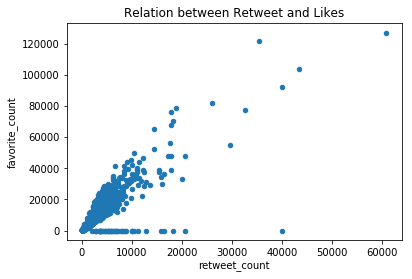

In [399]:
twitter_archive_cons_copy.plot(x='retweet_count',y='favorite_count',kind='scatter',title='Relation between Retweet and Likes')

2. Checking the relation between the number of numerator rating and retweet counts

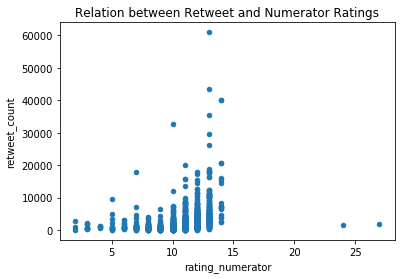

In [400]:
twitter_archive_cons_copy.plot(x='rating_numerator',y='retweet_count',kind='scatter',title='Relation between Retweet and Numerator Ratings')

3.Checking the relation between the number of numerator rating and likes

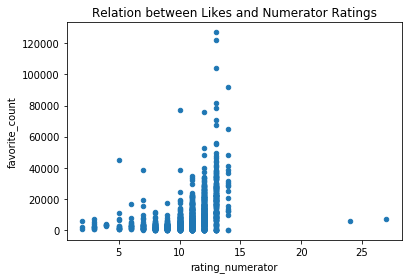

In [401]:
twitter_archive_cons_copy.plot(x='rating_numerator',y='favorite_count',kind='scatter',title='Relation between Likes and Numerator Ratings')

In [402]:
twitter_archive_cons.to_csv('twitter_archive_master.csv')